# Generating 2D Conformation Using RDKit

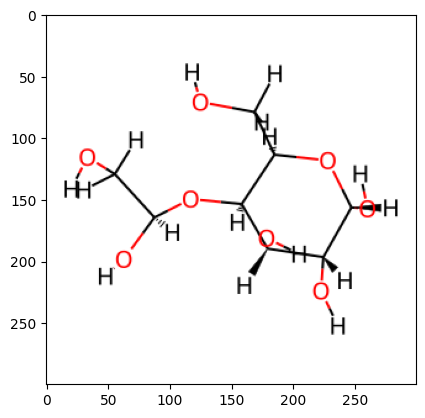

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Load sucrose from SMILES
sucrose_smiles = "OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]1O[C@H](CO)O"
mol = Chem.MolFromSmiles(sucrose_smiles)

# Generate 3D coordinates
mol_3d = Chem.AddHs(mol)  # Add hydrogens
AllChem.EmbedMolecule(mol_3d, randomSeed=42)

# Draw 3D structure
from rdkit.Chem import Draw

img = Draw.MolToImage(mol_3d, size=(300, 300))
plt.imshow(img)

# Visualizing in 3D Space

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Convert RDKit molecule to 3Dmol JSON format
sucrose_smiles = "OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]1O[C@H](CO)O"
mol = Chem.MolFromSmiles(sucrose_smiles)
mol_3d = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol_3d, randomSeed=42)

# Convert to a 3Dmol.js compatible format
block = Chem.MolToMolBlock(mol_3d)
block[:50]

'\n     RDKit          3D\n\n 32 32  0  0  0  0  0  0 '

In [33]:
import py3Dmol

# Initialize Py3Dmol view
view = py3Dmol.view(width=800, height=400)

# Add molecule model
view.addModel(block, "sdf")

# Set styles
view.setStyle({"stick": {}})
# view.setStyle({'sphere': {'color': 'red', 'scale': 0.4}})
# view.setStyle({'stick': {'color': 'gray', 'radius': 0.2}})
# view.setStyle({'stickAndBall': {'stick': {'color': 'orange'}, 'ball': {'color': 'blue'}}})
# view.setStyle({'label': {'text': 'Atom', 'color': 'black'}})


# Render the visualization
view.setBackgroundColor("white")
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
from rdkit.Chem import AllChem

# Generate 3D coordinates and save to a file
AllChem.EmbedMolecule(mol_3d, randomSeed=42)
AllChem.MolToPDBFile(mol_3d, "sucrose.pdb")

# Conformation of bacteriorhodopsin

In [36]:
# Import necessary libraries
import py3Dmol
import requests

# Download the PDB file for bacteriorhodopsin from the Protein Data Bank
pdb_id = "1F88"
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
response = requests.get(url)

# Save the PDB file locally
with open(f"{pdb_id}.pdb", "w") as file:
    file.write(response.text)

# Read the PDB file into a string
pdb_data = response.text
pdb_data[:100]

'HEADER    SIGNALING PROTEIN                       29-JUN-00   1F88              \nTITLE     CRYSTAL S'

In [37]:
# Create a 3Dmol view in the Jupyter Notebook
view = py3Dmol.view(width=800, height=400)

# Add the PDB model to the view
view.addModel(pdb_data, "pdb")

# Style the visualization
# view.setStyle({'stick': {}})
view.setBackgroundColor("white")

# Add a cartoon style representation
view.addStyle({"cartoon": {"color": "spectrum"}})

# Zoom to fit the structure
view.zoomTo()

# Show the visualization
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [1]:
import requests

# Define the PDB IDs and their URLs
pdb_ids = {"EPHX2/sEH": "4F1J", "BRD4": "5L8E", "ALB": "3V03"}

# Download each PDB file and save it locally
for target, pdb_id in pdb_ids.items():
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        with open(f"{pdb_id}.pdb", "w") as file:
            file.write(response.text)
        print(f"Downloaded {target} PDB file: {pdb_id}.pdb")
    else:
        print(f"Failed to download {target} PDB file: {pdb_id}")

Downloaded EPHX2/sEH PDB file: 4F1J.pdb
Downloaded BRD4 PDB file: 5L8E.pdb
Downloaded ALB PDB file: 3V03.pdb


In [6]:
import py3Dmol

# Load the PDB file into a string
with open("3V03.pdb", "r") as file:
    pdb_data = file.read()

# Create a 3Dmol view in the Jupyter Notebook
view = py3Dmol.view(width=800, height=400)

# Add the PDB model to the view
view.addModel(pdb_data, "pdb")

# Style the visualization
# view.setStyle({'stick': {}})
view.setBackgroundColor("white")

# Add a cartoon style representation
view.addStyle({"cartoon": {"color": "spectrum"}})

# Zoom to fit the structure
view.zoomTo()

# Show the visualization
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Featurizing a Molecule

In [1]:
import deepchem as dc
from rdkit import Chem

Skipped loading some Pytorch utilities, missing a dependency. No module named 'torch'


This module requires PyTorch to be installed.


No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
# 1) ECFPs: Extended-Connectivity Fingerprints
smiles = ["C1CCCCC1", "O1CCOCC1"]  # cyclohexane and dioxane
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
feat = dc.feat.CircularFingerprint(size=1024)
arr = feat.featurize(mols)
print(arr[0].shape)
print(arr[0])

(1024,)
[0. 0. 1. ... 0. 0. 0.]


[17:14:42] DEPRECATION WARNING: please use MorganGenerator
[17:14:42] DEPRECATION WARNING: please use MorganGenerator


In [3]:
# 2) Molecular Descriptors
feat = dc.feat.RDKitDescriptors()
arr = feat.featurize(mols)
print(arr[0].shape)
print(arr[0][:10])

(210,)
[ 1.71997309  1.94969403 -2.05230597  2.1471     -1.8549      4.506
  0.504      14.014      10.012       2.        ]


[17:14:43] DEPRECATION WARNING: please use MorganGenerator
[17:14:43] DEPRECATION WARNING: please use MorganGenerator
[17:14:43] DEPRECATION WARNING: please use MorganGenerator
[17:14:43] DEPRECATION WARNING: please use MorganGenerator
[17:14:43] DEPRECATION WARNING: please use MorganGenerator
[17:14:43] DEPRECATION WARNING: please use MorganGenerator


In [4]:
# 3) Graph Convolutions

In [5]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer="GraphConv")
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
model = dc.models.GraphConvModel(n_tasks=1, mode="regression", dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

In [ ]:
# Evaluate it.
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score")
print(model.evaluate(train_dataset, [metric], transformers))
print("Test set score")
print(model.evaluate(test_dataset, [metric], transformers))

In [ ]:
from rdkit import Chem

# Use it to predict the solubility of some molecules.
smiles = [
    "COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C",
    "CCOC(=O)CC",
    "CSc1nc(NC(C)C)nc(NC(C)C)n1",
    "CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1",
    "Cc1cc2ccccc2cc1C",
]


mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)

#
predicted_solubility = model.predict_on_batch(x)
for m, s in zip(smiles, predicted_solubility):
    print()
    print("Molecule:", m)
    print("Predicted solubility:", s)

# SMARTS Strings

In [9]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

smiles_list = ["CCCCC", "CCOCC", "CCNCC", "CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

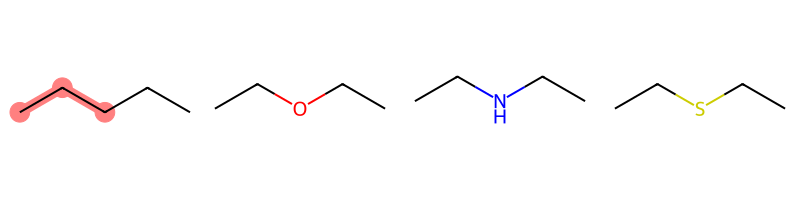

In [10]:
query = Chem.MolFromSmarts("CCC")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

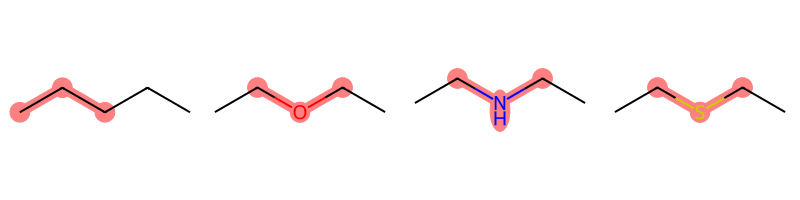

In [11]:
query = Chem.MolFromSmarts("C*C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

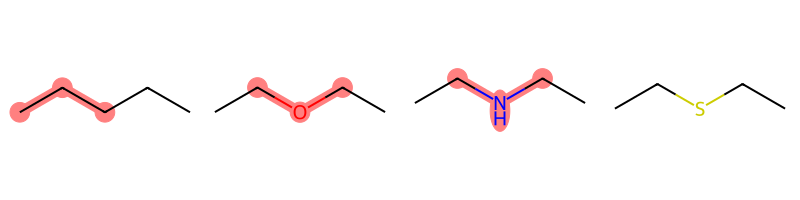

In [12]:
query = Chem.MolFromSmarts("C[C,N,O]C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)